In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

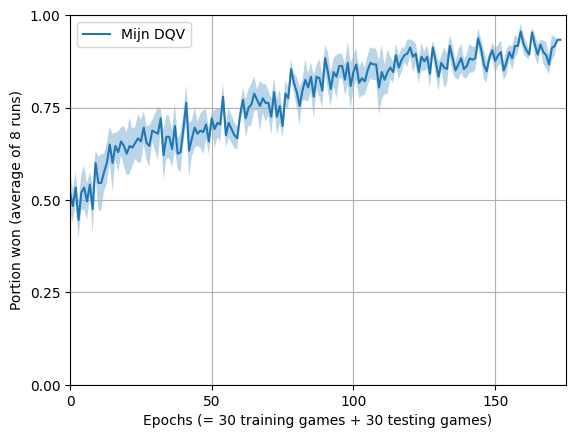

In [15]:
def plot_wins(dir_name: str, label: str):
    files = [os.path.join(dir_name, f) for f in os.listdir(dir_name) if f.endswith(".csv")]
    wins_arr = []
    max_len = 0
    for f in files:
        df = pd.read_csv(f)
        subtr = df["games"].to_numpy() - 30
        wins = df[" wins"].to_numpy() - subtr
        wins = wins / 30
        wins[(wins > 30) | (wins < 0)] = np.nan
        wins_arr += [wins]
        if len(wins) > max_len:
            max_len = len(wins)

    all = np.ones([len(wins_arr), max_len]) * np.nan
    for idx, arr in enumerate(wins_arr):
        all[idx, :len(arr)] = arr
    
    mean = np.nanmean(all, axis=0)
    std = np.nanstd(all, axis=0)
    
    x = np.arange(len(mean))
    plt.plot(np.arange(len(mean)), mean, label=label)
    plt.fill_between(x, mean - 0.5 * std, mean + 0.5 * std, alpha=0.3)


plot_wins("./sa_nonatom_results/", "Mijn DQV")
plt.grid()
plt.xlim(0, 175)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 175, 50))
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("Epochs (= 30 training games + 30 testing games)")
plt.ylabel("Portion won (average of 8 runs)")
plt.legend()
plt.show()

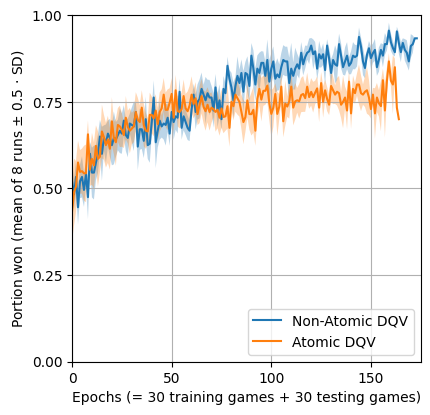

In [45]:
plot_wins("./sa_nonatom_results/", "Non-Atomic DQV")
plot_wins("./sa_atom_results/", "Atomic DQV")
plt.grid()
plt.xlim(0, 175)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 160, 50))
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("Epochs (= 30 training games + 30 testing games)")
plt.ylabel("Portion won (mean of 8 runs ± 0.5 $\\cdot$ SD)")
plt.legend(loc="lower right")

fig = plt.gcf()
fig.set_size_inches(4.5,4.5)
plt.show()
# plt.savefig("sa_results.svg", format="svg")